# 기초

In [1]:
import numpy as np
import pandas as pd

라이브러리 import

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/population_sample.csv'
pop = pd.read_csv(path)

pop.head()

,year,household,k_male,k_female,f_male,f_female
0,1981,NaN,4160,4191,NaN,NaN
1,1982,NaN,4160,4191,NaN,NaN
2,1983,2116.0,4160,4191,NaN,NaN
3,1984,2246.0,4160,4191,NaN,NaN
4,1985,2338.0,4788,4838,7.0,6.0


CSV 파일에서 데이터 읽어 오기

In [5]:
pop.shape

(42, 6)

데이터프레임 모양 확인 -> (행수, 열수)

In [6]:
pop.info() # 인덱스, 열, 값, 개수, 데이터 형식 정보 등 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       42 non-null     int64  
 1   household  40 non-null     float64
 2   k_male     42 non-null     int64  
 3   k_female   42 non-null     int64  
 4   f_male     38 non-null     float64
 5   f_female   38 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 2.1 KB


In [7]:
pop.describe() # 기초 통계 정보 확인

,year,household,k_male,k_female,f_male,f_female
count,42.000000,40.000000,42.00000,42.000000,38.000000,38.000000
mean,2001.500000,3617.200000,4979.00000,5033.738095,67.552632,72.578947
std,12.267844,667.786285,344.36141,307.954468,50.758941,57.153483
min,1981.000000,2116.000000,4160.00000,4191.000000,5.000000,4.000000
25%,1991.250000,3419.000000,4841.75000,4986.750000,21.750000,19.500000
50%,2001.500000,3669.500000,5062.00000,5121.000000,51.500000,57.500000
75%,2011.750000,4190.000000,5153.75000,5153.000000,121.000000,133.500000
max,2022.000000,4446.000000,5500.00000,5435.000000,137.000000,148.000000


In [10]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
titanic = pd.read_csv(path)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [17]:
titanic.loc[titanic['Survived'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  549 non-null    int64  
 1   Survived     549 non-null    int64  
 2   Pclass       549 non-null    int64  
 3   Name         549 non-null    object 
 4   Sex          549 non-null    object 
 5   Age          424 non-null    float64
 6   Fare         549 non-null    float64
 7   Embarked     549 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 38.6+ KB


`.loc`: 조건으로 조회

In [13]:
titanic.loc[:, ['Survived','Fare']]

,Survived,Fare
0,0,7.2500
1,1,71.2833
2,1,7.9250
3,1,53.1000
4,0,8.0500
...,...,...
886,0,13.0000
887,1,30.0000
888,0,23.4500
889,1,30.0000


특정 열 이름만 지정해서, 모든 행을 가져오기

### (+) 편리한 메소드

`isin()`, `betwwen()`

### (+) 집계 함수

- `sum()`
- `mean()`
- `max()`
- `min()`
- `count()`

In [25]:
titanic.groupby('Sex', as_index=True)['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [27]:
titanic.groupby('Sex', as_index=True)[['Survived']].sum()

,Survived
Sex,
female,233
male,109


집계대상변수(`Survived`)를 다시 `[]`로 한 번 더 감싸니까, 결과가 데이터프레임으로 나타나는구나~

In [30]:
titanic.groupby('Sex', as_index=False)['Survived'].sum()

,Sex,Survived
0,female,233
1,male,109


헐. 이렇게 해도 데이터프레임으로 나타나는구나~

In [31]:
titanic.groupby(['Sex', 'Survived'], as_index=False)[['Fare','Pclass']].sum()

,Sex,Survived,Fare,Pclass
0,female,0,1864.9752,231
1,female,1,12101.6876,447
2,male,0,10277.7447,1159
3,male,1,4449.5418,220


- 집계 대상 열을 리스트로 지정 가능
- 집계 기준 열을 여럿 설정 가능

In [36]:
# 'Survived' 별 'Age'의 합계, 평균, 최댓값, 최솟값
titanic.groupby('Survived')['Age'].agg(['sum','mean','max','min'])

,sum,mean,max,min
Survived,,,,
0,12985.50,30.626179,74.0,1.00
1,8219.67,28.343690,80.0,0.42


`.agg()` 메소드로 다양한 집계
- 여러 열에 대해 한 번에 집계 가능

In [39]:
titanic.groupby('Survived')[['Age','Fare']].agg(['sum','mean','max','min'])

Age                               Fare                       \
               sum       mean   max   min         sum       mean       max   
Survived                                                                     
0         12985.50  30.626179  74.0  1.00  12142.7199  22.117887  263.0000   
1          8219.67  28.343690  80.0  0.42  16551.2294  48.395408  512.3292   

               
          min  
Survived       
0         0.0  
1         0.0

오오~
이런식으로 리스트를 전달하여, **여러 열에 대해 여러 집계를 한 번에 수행 가능**

In [42]:
titanic.groupby('Survived', as_index=False).agg({'Fare':'sum','Fare':'mean','Age':'max','Age':'min'})

,Survived,Fare,Age
0,0,22.117887,1.00
1,1,48.395408,0.42


헐.

그리고 이런식으로, **여러 열에 대한 집계를 각 열마다 따로, 다른 집계로, 한 번에 수행 가능**

# 데이터프레임 변경

- 열 이름 변경
- 열 추가
- 열 삭제
- `map`, `cut`

In [3]:
import numpy as np
import pandas as pd

In [5]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/population_sample.csv'
pop = pd.read_csv(path)

pop.head()

,year,household,k_male,k_female,f_male,f_female
0,1981,NaN,4160,4191,NaN,NaN
1,1982,NaN,4160,4191,NaN,NaN
2,1983,2116.0,4160,4191,NaN,NaN
3,1984,2246.0,4160,4191,NaN,NaN
4,1985,2338.0,4788,4838,7.0,6.0


In [6]:
pop.columns = ['year','Hhold','k_male','k_female','f_male','f_female']

pop.head()

,year,Hhold,k_male,k_female,f_male,f_female
0,1981,NaN,4160,4191,NaN,NaN
1,1982,NaN,4160,4191,NaN,NaN
2,1983,2116.0,4160,4191,NaN,NaN
3,1984,2246.0,4160,4191,NaN,NaN
4,1985,2338.0,4788,4838,7.0,6.0


모든 열의 이름을 변경했어요.

기존 열의 개수만큼 써줘야 겠죠?

In [7]:
pop.rename(columns={
    'Hhold':'household'
}, inplace=True)

pop.head()

,year,household,k_male,k_female,f_male,f_female
0,1981,NaN,4160,4191,NaN,NaN
1,1982,NaN,4160,4191,NaN,NaN
2,1983,2116.0,4160,4191,NaN,NaN
3,1984,2246.0,4160,4191,NaN,NaN
4,1985,2338.0,4788,4838,7.0,6.0


`rename()` 메소드를 사용하여, 지정한 열의 이름만 변경했어요.

In [13]:
pop['k_total'] = pop['k_male'] + pop['k_female']
pop['f_total'] = pop['f_male'] + pop['f_female']

pop.head()

,year,household,k_male,k_female,f_male,f_female,f_total,k_total
0,1981,NaN,4160,4191,NaN,NaN,NaN,8351
1,1982,NaN,4160,4191,NaN,NaN,NaN,8351
2,1983,2116.0,4160,4191,NaN,NaN,NaN,8351
3,1984,2246.0,4160,4191,NaN,NaN,NaN,8351
4,1985,2338.0,4788,4838,7.0,6.0,13.0,9626


기존에 없던 열에 냅다 데이터를 넣어버리면, 그 열이 추가돼요

`insert()` 메소드를 사용하면, 원하는 위치에 열을 추가할 수도 있는데요..

굳이 그러진 않아도 돼요. (궁금해지면 따로 찾아봐야지)

In [14]:
pop.drop(['k_total','f_total'], axis=1, inplace=True) # axis=1 : 열 삭제
# []에 넣어서 리스트 형태로, 여러 개 를 삭제할 수도 있군~

pop.head()

,year,household,k_male,k_female,f_male,f_female
0,1981,NaN,4160,4191,NaN,NaN
1,1982,NaN,4160,4191,NaN,NaN
2,1983,2116.0,4160,4191,NaN,NaN
3,1984,2246.0,4160,4191,NaN,NaN
4,1985,2338.0,4788,4838,7.0,6.0


`drop()` 메소드를 사용해 열 삭제
- `axis=0`: 행 삭제(기본 값)
- `axis=1`: 열 삭제
- `inplace=False`: 삭제한 것처럼 보여주세요
- `inplace=True`: 진짜 삭제해 주세요
    - 아무래도 inplace 라는 것은 그런 것이죠

값 변경 같은 경우에도

열 이름 지정한 다음에 `= ~~~` 이런 식으로 냅다 대입하면 되더군요.

아니면 `.loc[]`를 이용해 조건에 의한 값 변경을 꾀해도 좋구요.

조건에 의한 값 변경의 방법으로 `where()` 메소드를 이용하는 방법도 있습니다.path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
titanic = pd.read_csv(path)

titanic.head()

In [23]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
titanic = pd.read_csv(path)

In [24]:
display(titanic.head())

titanic['Survived'] = titanic['Survived'].map({
    1: 'Yes',
    0: 'No',
})

display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


값 변경에는 `.map()`으로 기존 값에 매핑하여 변경하는 것도 가능합니다..

In [27]:
titanic['Age'] = pd.cut(titanic['Age'], 10, labels=['10세 미만','10대','20대','30대','40대','50대','60대','70대','80대','90대'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,20대,7.2500,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,40대,71.2833,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,30대,7.9250,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,40대,53.1000,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,40대,8.0500,Southampton


`Age` 주목!

숫자형 -> 범주형 변수로 변환할 때 `cut()`

# 데이터프레임 결합

- pd.concat()
    - 매핑 기준: 인덱스(행), 칼럼이름(열)
    - `axis=0`: 위, 아래로 붙여라. 행 방향으로 붙여라. (칼럼 이름 기준)
    - `axis=1`: 옆으로 붙여라. 열 방향으로 붙여라. (행 인덱스 기준)
- pd.merge()
    - 매핑 기준: 특정 칼럼(key)의 값 기준으로 결합
    - 데이터베이스의 `join`과 같음
        - `outer`, `inner`, `left`, `right`

```python
dataframe.pivot(index, column, values)
```

`pivot()` 메소드를 이용하여, 집계된 데이터를 재구성 할 수도 있다.

피벗이 뭘까..

언제 어떻게 잘 쓸 수 있을지는, 추후 훈련 해보면서 알 수 있을 듯?

아무튼, 일단 `groupby`로 집계를 한 다음에, 냅다 `pivot`도 시켜보면 아름다워질 것 같다.

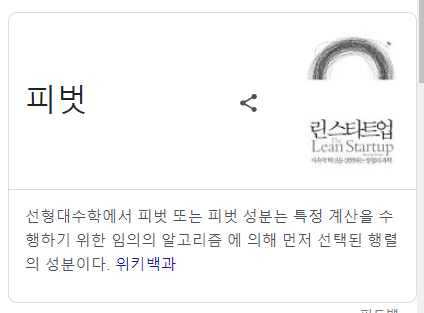

# 시계열 데이터 처리

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")
products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")

In [3]:
# 판매액 계산하기
temp = pd.merge(sales, products)
temp['Amt' ] = temp['Qty'] * temp['Price']
temp['Amt'] = (temp['Amt']/1000).round()  # 단위 1000달러

# 집계
data1 = temp.groupby(['Date', 'Category'], as_index = False)['Amt'].sum()
data2 = temp.groupby(['Date'], as_index = False)['Amt'].sum()

# 피봇
data11 = data1.pivot('Date', 'Category', 'Amt').reset_index()

# 합치기
data = pd.merge(data2, data11)

In [5]:
display(sales.head())
display(products.head())
display(data.head())

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23
3,15,HK002,Kitchen,Household Goods,2,41
4,32,GS001,Seafood,Grocery,3,34


,Date,Amt,Drink,Food,Grocery,Household Goods
0,2013-01-01,20.0,7.0,4.0,6.0,3.0
1,2013-01-02,3938.0,604.0,549.0,1663.0,1122.0
2,2013-01-03,2885.0,444.0,376.0,1222.0,843.0
3,2013-01-04,2907.0,490.0,386.0,1252.0,779.0
4,2013-01-05,3831.0,704.0,505.0,1560.0,1062.0


In [7]:
data['Amt_lag1'] = data['Amt'].shift()
data['Amt_lag2'] = data['Amt'].shift(2)
data['Amt_lag_1'] = data['Amt'].shift(-1)

data.head()

,Date,Amt,Drink,Food,Grocery,Household Goods,Amt_lag1,Amt_lag2,Amt_lag_1
0,2013-01-01,20.0,7.0,4.0,6.0,3.0,NaN,NaN,3938.0
1,2013-01-02,3938.0,604.0,549.0,1663.0,1122.0,20.0,NaN,2885.0
2,2013-01-03,2885.0,444.0,376.0,1222.0,843.0,3938.0,20.0,2907.0
3,2013-01-04,2907.0,490.0,386.0,1252.0,779.0,2885.0,3938.0,3831.0
4,2013-01-05,3831.0,704.0,505.0,1560.0,1062.0,2907.0,2885.0,4066.0


Time Lag -- 시간 지연

아하! 이런 식으로.. 시계열 데이터에서 시간의 흐름 전후로 정보를 이동시킬 수 있구나.

In [8]:
data['Amt_MA3'] = data['Amt'].rolling(3).mean()
data['Amt_MM3'] = data['Amt'].rolling(3).max()
data['Amt_MA3_2'] = data['Amt'].rolling(3, min_periods=1).mean()

data.head()

,Date,Amt,Drink,Food,Grocery,Household Goods,Amt_lag1,Amt_lag2,Amt_lag_1,Amt_MA3,Amt_MM3,Amt_MA3_2
0,2013-01-01,20.0,7.0,4.0,6.0,3.0,NaN,NaN,3938.0,NaN,NaN,20.000000
1,2013-01-02,3938.0,604.0,549.0,1663.0,1122.0,20.0,NaN,2885.0,NaN,NaN,1979.000000
2,2013-01-03,2885.0,444.0,376.0,1222.0,843.0,3938.0,20.0,2907.0,2281.000000,3938.0,2281.000000
3,2013-01-04,2907.0,490.0,386.0,1252.0,779.0,2885.0,3938.0,3831.0,3243.333333,3938.0,3243.333333
4,2013-01-05,3831.0,704.0,505.0,1560.0,1062.0,2907.0,2885.0,4066.0,3207.666667,3831.0,3207.666667


시간의 흐름에 따라, 일정 기간 동안 평균을 이동하면서 구하기

moving average

min_periods를 설정할 수도 있구나~

In [11]:
#  -- 다시 셋팅 --

# 판매액 계산하기
temp = pd.merge(sales, products)
temp['Amt' ] = temp['Qty'] * temp['Price']
temp['Amt'] = (temp['Amt']/1000).round()  # 단위 1000달러

# 집계
data1 = temp.groupby(['Date', 'Category'], as_index = False)['Amt'].sum()
data2 = temp.groupby(['Date'], as_index = False)['Amt'].sum()

# 피봇
data11 = data1.pivot('Date', 'Category', 'Amt').reset_index()

# 합치기
data = pd.merge(data2, data11)

In [12]:
data['Amt_diff1'] = data['Amt'].diff()
data['Amt_diff2'] = data['Amt'].diff(2)

data.head()

,Date,Amt,Drink,Food,Grocery,Household Goods,Amt_diff1,Amt_diff2
0,2013-01-01,20.0,7.0,4.0,6.0,3.0,NaN,NaN
1,2013-01-02,3938.0,604.0,549.0,1663.0,1122.0,3918.0,NaN
2,2013-01-03,2885.0,444.0,376.0,1222.0,843.0,-1053.0,2865.0
3,2013-01-04,2907.0,490.0,386.0,1252.0,779.0,22.0,-1031.0
4,2013-01-05,3831.0,704.0,505.0,1560.0,1062.0,924.0,946.0


# 시각화 라이브러리

- 시각화를 통해, 비지니스의 인사이트를 파악하는 것.

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
titanic = pd.read_csv(path)

In [22]:
path = 'https://bit.ly/3PArw4W'
boston = pd.read_csv(path)

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


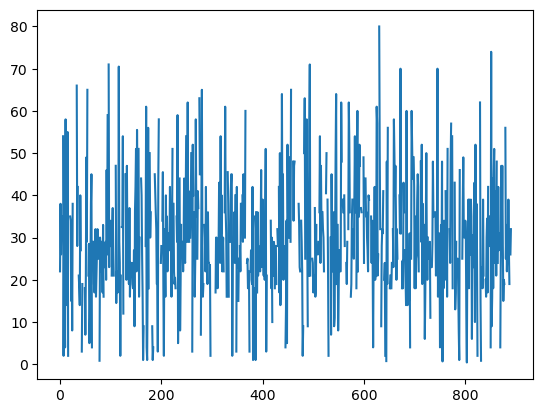

In [20]:
plt.plot(titanic['Age'])

plt.show()

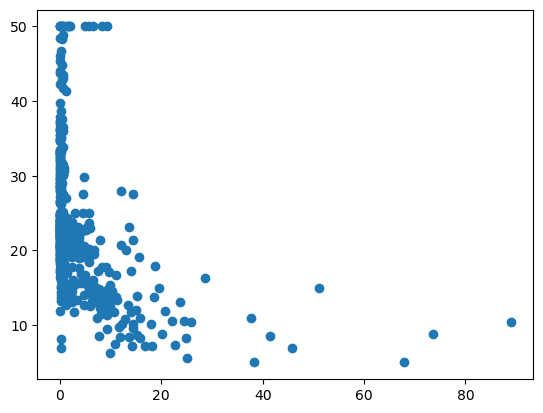

In [27]:
plt.scatter('crim','medv',data=boston)

plt.show()

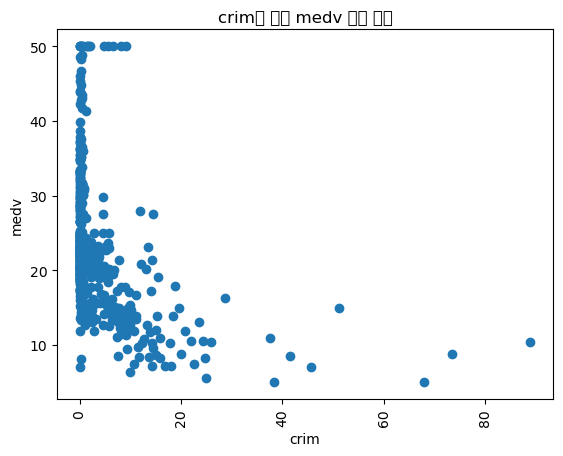

In [30]:
plt.scatter('crim','medv',data=boston)

plt.xticks(rotation=90) # x축 라벨 rotation
plt.xlabel('crim') # 축 레이블 붙이기
plt.ylabel('medv')
plt.title('crim에 따른 medv 분포 확인') # 그레프 타이틀

plt.show()

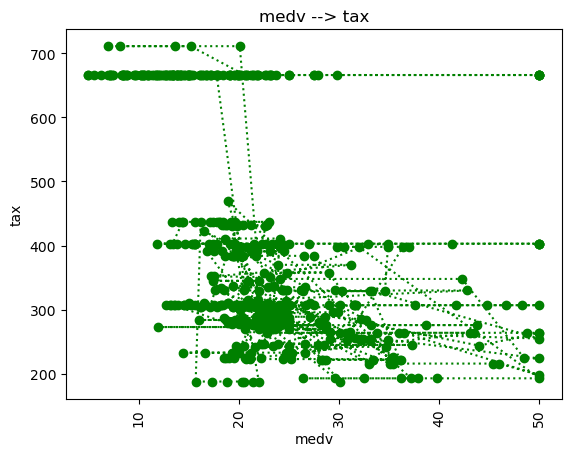

In [36]:
plt.plot(boston['medv'],boston['tax'],
        color='green', linestyle='dotted', marker='o')

plt.xticks(rotation=90)
plt.xlabel('medv')
plt.ylabel('tax')
plt.title('medv --> tax')

plt.show()

..ㅋ

line graph로 그리기엔 적절하지 않아 보이지만, 아무튼 이런 식으로 그래프를 꾸밀 수 있더라~

- `color=`
- `linestyle=`
- `marker=`

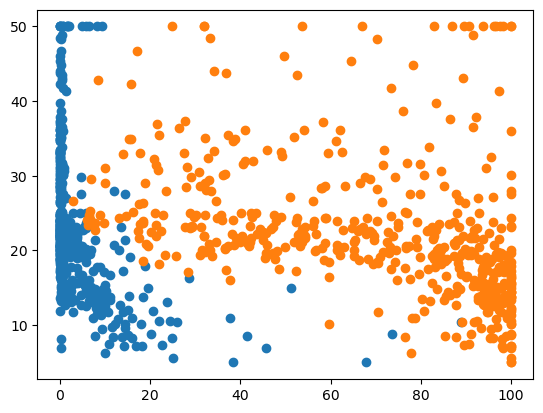

In [38]:
plt.scatter('crim','medv',data=boston)
plt.scatter('age','medv',data=boston)

plt.show()

그래프 두 개를 이렇게 겹쳐놨다가

`show()`로 발사 하는 거구나

stack 같은 거에 쌓아놨다가 한번에 뿅 하는 거구나

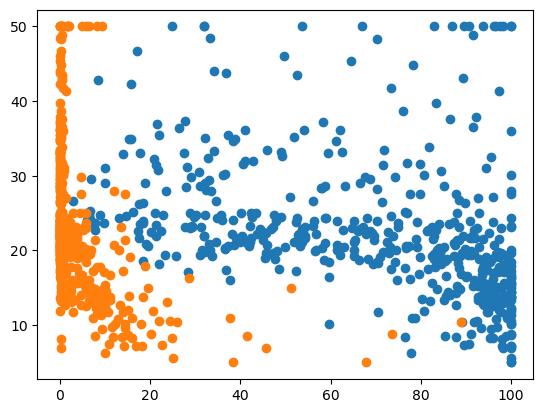

In [39]:
plt.scatter('age','medv',data=boston)
plt.scatter('crim','medv',data=boston)

plt.show()

아~ 이렇게..

그려 넣은 순서에 따라 이렇게 쌓이는 구나~

### (+) 범례, 그리드
- `legend()`: 범례
- `grid()`: 그리드

데이터프레임 에서도 `.plot()`을 쓸 수 있다고 하네요.

# 단변량 분석

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
titanic = pd.read_csv(path)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


In [6]:
print(np.mean(titanic['Fare'])) # 넘파이 함수
print(titanic['Fare'].mean()) # 판다스 메서드

32.2042079685746
32.2042079685746


`mean` 평균

In [7]:
print(np.median(titanic['Fare'])) # 넘파이 함수
print(titanic['Fare'].median()) # 판다스 메서드

14.4542
14.4542


`median` 중위수

In [26]:
print(titanic['Pclass'].mode()) # 판다스 메서드

0    3
dtype: int64


`mode` 최빈값

(+) 조화 평균
- harmonic mean
- 분자가 동일한 두 비율의 평균
- a, b가 있을 때, a와 b의 각각의 역수의 평균의 역수
- (2ab)/(a+b)

In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


기초 통계량 `describe()`

- `count` 데이터 개수
- `25%`, `50%`, `75%`: 1사분위수, 2사분위수, 3사분위수

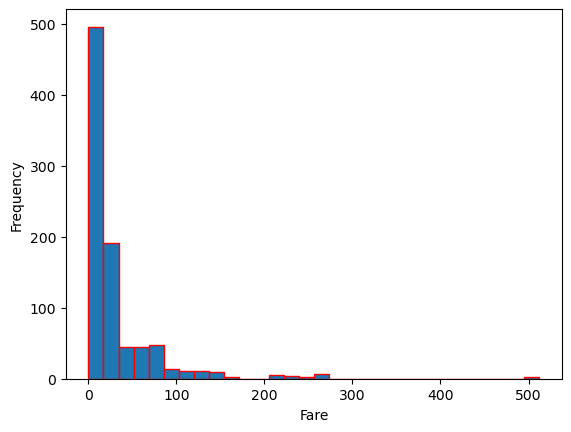

In [15]:
plt.hist(titanic['Fare'], bins=30,
        edgecolor='red')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

히스토그램 histogram

- 히스토그램을 그릴 때는, `bins`를 적절히 조절해 그릴 것

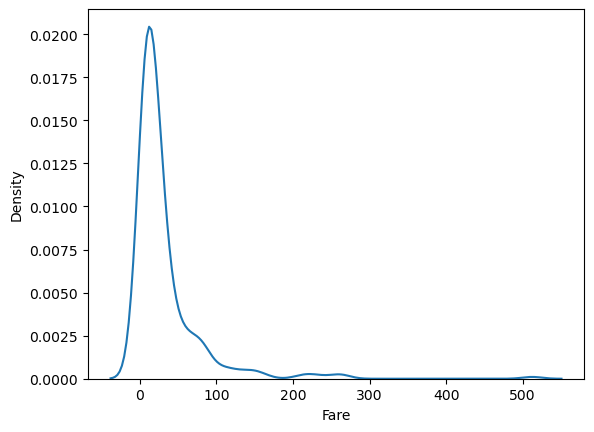

In [16]:
sns.kdeplot(titanic['Fare'])
plt.show()

밀도함수 그래프
- 헐! 구간의 너비를 정하지 않아도 되는구나.
- 커널 밀도 추정 kernel density estimation 방식
- 밀도 함수 그래프 아래 면적은 '1'
- 면적으로 구간에 대한 확률 추정

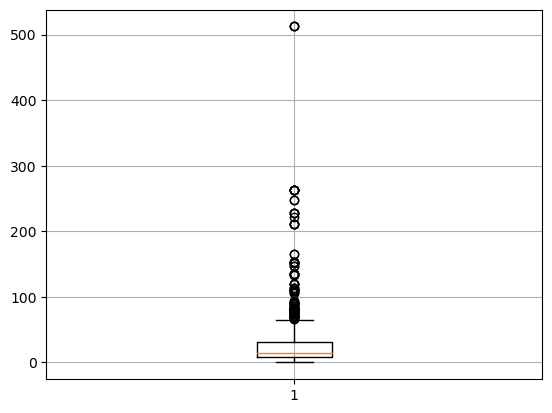

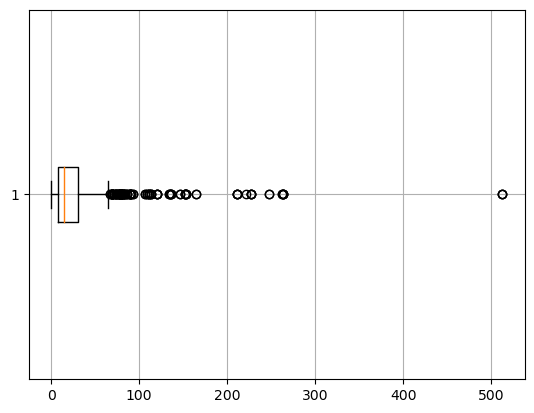

In [21]:
plt.boxplot(titanic['Fare'])
plt.grid()
plt.show()

plt.boxplot(titanic['Fare'], vert=False)
plt.grid()
plt.show()

이 box plot은 요상하게 생겼네요. box plot을 그리기에 적절하지 않은 데이터였던 것 같아요.

아무튼..

- `vert=` 파라미터를 통해 횡형, 종형 설정 가능
- `박스`, `수염`

### IQR
- `3사분위수 - 1사분위수`
- 저 박스의.. 높이.? 크기..
- 박스의 처음 시작 부분의 값이 Q1, 끝나는 부분이 Q3 이니까..

# 단변량 분석 - 범주형

In [22]:
titanic['Embarked'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

범주 별 빈도수

In [23]:
titanic['Embarked'].value_counts() / titanic.shape[0]

Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
Name: Embarked, dtype: float64

이렇게 하면? `범주 별 비율`이 된다.

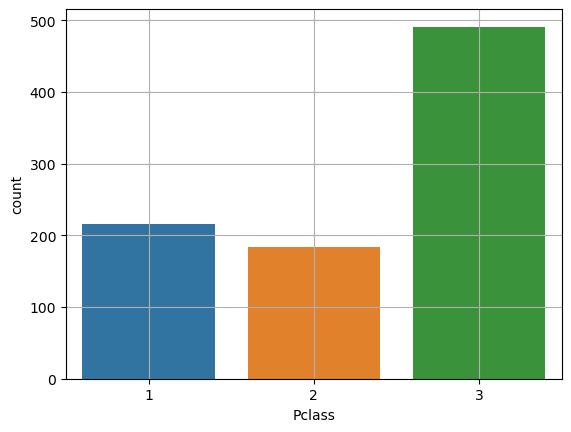

In [35]:
sns.countplot(x='Pclass', data=titanic)
plt.grid()
plt.show()

`countplot`이, 범주 별 빈도수를 계산하고 bar plot으로 나타내 주는구나